In [61]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import sys
sys.path.append("/Users/szagar/ZTS/Dropbox/Business/ats/Code/lib")
from db_query import connectDB

In [5]:
dbh = connectDB()

In [11]:
def prepare_data(is_file, oos_file):
    if not is_file or not oos_file:
        return None

    df_is = pd.read_csv(is_file, sep="\t", index_col="Test")
    df_oos = pd.read_csv(oos_file, sep="\t", index_col="Test")

    strat_name = [c.split(":")[0] for c in df_is.columns if c.startswith("proto_")][0]

    df_oos.rename(
        columns=lambda n: n.replace(f"{strat_name}: ", "param:"), inplace=True
    )
    df_oos.rename(columns=lambda n: n.replace("All:", "OOS:"), inplace=True)
    df_is.rename(columns=lambda n: n.replace(f"{strat_name}: ", "param:"), inplace=True)
    df_is.rename(columns=lambda n: n.replace("All:", "IS:"), inplace=True)

    df = df_is.join(df_oos.loc[:, df_oos.columns.str.startswith("OOS:")])
    df["IS: NP2DD"] = df["IS: Net Profit"] / -df["IS: Max Intraday Drawdown"]
    df["OOS: NP2DD"] = df["OOS: Net Profit"] / -df["OOS: Max Intraday Drawdown"]

    df["IS: Expectancy"] = df["IS: Avg Winning Trade"] * df[
        "IS: % Profitable"
    ] / 100 - df["IS: Avg Losing Trade"] * (1 - df["IS: % Profitable"] / 100)

    df["OOS: Expectancy"] = df["OOS: Avg Winning Trade"] * df[
        "OOS: % Profitable"
    ] / 100 - df["OOS: Avg Losing Trade"] * (1 - df["OOS: % Profitable"] / 100)

    df["AvgTrade_Filter"] = 0
    df["Quartile"] = 0
    df.sort_values(["IS: TradeStation Index"], ascending=False, inplace=True)

    return df


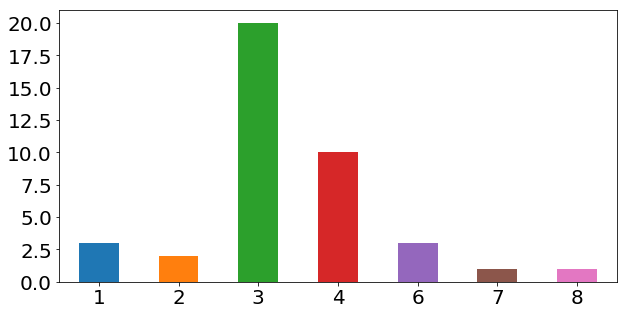

In [85]:
arc_dir = '/Users/szagar/ZTS/Dropbox/Business/ats/Archive/DPfiles'

proto_id_list = [15,20,25,30]
r_df = pd.DataFrame()
for proto_id in proto_id_list:
    is_file = f"{arc_dir}/proto_{proto_id}_is.csv"
    oos_file = f"{arc_dir}/proto_{proto_id}_oos.csv"
    df = prepare_data(is_file, oos_file)
    #print(df.columns)
    df_top = df.sort_values('IS: TradeStation Index', ascending=False)[['IS: TradeStation Index','param:poi','param:filter_1']].head(10)
    #print(df_top)
    #r_df.append(df_top, ignore_index=True)
    r_df = pd.concat([r_df,df_top], axis=0)
tst = r_df['param:poi'].value_counts()
#print(tst)
g = r_df['param:poi'].value_counts().sort_index().plot.bar(figsize=(10,5), fontsize=20, rot=0)

In [87]:
df['param:filter_1'].value_counts()#.idxmax()

10    569
27    531
3     438
26    424
29    401
7     277
30    265
23    247
8     245
28    236
21    226
20    211
22    208
6     201
5     197
19    192
39    183
38    182
12    167
2     165
1     164
4     163
25    162
24    155
15    154
37    152
9     144
33    143
11    140
35    139
14    129
17    127
13    116
18     96
40     86
16     80
32     78
36     78
31     73
34     56
Name: param:filter_1, dtype: int64